In [12]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve,auc


In [5]:
import pandas as pd

df=pd.read_csv('Creditcard_data.csv')
df.head()

# # Assuming your dataset is in a DataFrame called df, and the target column is 'target'
# # Replace 'target' with the actual name of your target column
# class_distribution = df['target'].value_counts()

# print(class_distribution)
# # Assuming your dataset is in a DataFrame called df, and the target column is 'target'
# # Replace 'target' with the actual name of your target column
# class_distribution = df['target'].value_counts()

# print(class_distribution)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Check the distribution of the target column ('class')
class_distribution = df['Class'].value_counts()

print(f"Class distribution:\n{class_distribution}")

Class distribution:
Class
0    763
1      9
Name: count, dtype: int64


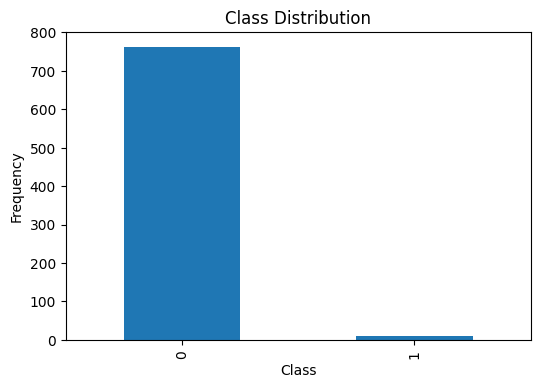

In [7]:
import matplotlib.pyplot as plt

class_distribution = df['Class'].value_counts()

plt.figure(figsize=(6,4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [8]:
majority_class_count = df['Class'].value_counts().max()
minority_class_count = df['Class'].value_counts().min()

imbalance_ratio = majority_class_count / minority_class_count
print(f"Imbalance ratio: {imbalance_ratio}")


Imbalance ratio: 84.77777777777777


In [9]:
# Features and target
X = df.drop(columns=['Class'])  # All columns except 'Class'
y = df['Class']  # The target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 1. **Random Undersampling**
under_sampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = under_sampler.fit_resample(X_train, y_train)

# 2. **Random Oversampling**
over_sampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = over_sampler.fit_resample(X_train, y_train)

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. **NearMiss**
near_miss = NearMiss(version=1)
X_train_nearmiss, y_train_nearmiss = near_miss.fit_resample(X_train, y_train)

# 5. **ClusterCentroids (Under-sampling)**
cluster_centroids = ClusterCentroids(random_state=42)
X_train_cluster, y_train_cluster = cluster_centroids.fit_resample(X_train, y_train)

In [13]:
# List of resampled datasets and corresponding model names
resampled_datasets = [
    (X_train_undersampled, y_train_undersampled, "Random Undersampling"),
    (X_train_oversampled, y_train_oversampled, "Random Oversampling"),
    (X_train_smote, y_train_smote, "SMOTE"),
    (X_train_nearmiss, y_train_nearmiss, "NearMiss"),
    (X_train_cluster, y_train_cluster, "ClusterCentroids")
]
# List of models
models = [
    (LogisticRegression(), "Logistic Regression"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(random_state=42,probability=True), "Support Vector Machine")
]

# Train models on resampled data and evaluate performance
results = []

for X_resampled, y_resampled, sampling_method in resampled_datasets:
    for model, model_name in models:
        # Train the model
        model.fit(X_resampled, y_resampled)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Store the results
        results.append({
            'Sampling Method': sampling_method,
            'Model': model_name,
            'Accuracy': accuracy
        })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

         Sampling Method                   Model  Accuracy
0   Random Undersampling     Logistic Regression  0.593548
1   Random Undersampling           Decision Tree  0.574194
2   Random Undersampling           Random Forest  0.709677
3   Random Undersampling     K-Nearest Neighbors  0.670968
4   Random Undersampling  Support Vector Machine  0.625806
5    Random Oversampling     Logistic Regression  0.877419
6    Random Oversampling           Decision Tree  0.987097
7    Random Oversampling           Random Forest  0.993548
8    Random Oversampling     K-Nearest Neighbors  0.980645
9    Random Oversampling  Support Vector Machine  0.696774
10                 SMOTE     Logistic Regression  0.877419
11                 SMOTE           Decision Tree  0.941935
12                 SMOTE           Random Forest  0.993548
13                 SMOTE     K-Nearest Neighbors  0.754839
14                 SMOTE  Support Vector Machine  0.670968
15              NearMiss     Logistic Regression  0.2709

In [14]:
# Pivot the DataFrame for a clear table format
pivot_table = results_df.pivot(index='Model', columns='Sampling Method', values='Accuracy')

# Display the table
print(pivot_table)


Sampling Method         ClusterCentroids  NearMiss  Random Oversampling  \
Model                                                                     
Decision Tree                   0.380645  0.077419             0.987097   
K-Nearest Neighbors             0.625806  0.212903             0.980645   
Logistic Regression             0.664516  0.270968             0.877419   
Random Forest                   0.509677  0.393548             0.993548   
Support Vector Machine          0.051613  0.348387             0.696774   

Sampling Method         Random Undersampling     SMOTE  
Model                                                   
Decision Tree                       0.574194  0.941935  
K-Nearest Neighbors                 0.670968  0.754839  
Logistic Regression                 0.593548  0.877419  
Random Forest                       0.709677  0.993548  
Support Vector Machine              0.625806  0.670968  


In [15]:
# Find the sampling method with the highest accuracy for each model
best_sampling_for_each_model = pivot_table.idxmax(axis=1)

# Find the accuracy corresponding to the best sampling method for each model
highest_accuracy_for_each_model = pivot_table.max(axis=1)

# Combine the results into a DataFrame for better readability
best_results_df = pd.DataFrame({
    'Best Sampling Method': best_sampling_for_each_model,
    'Highest Accuracy': highest_accuracy_for_each_model
})

# Display the results
print(best_results_df)


                       Best Sampling Method  Highest Accuracy
Model                                                        
Decision Tree           Random Oversampling          0.987097
K-Nearest Neighbors     Random Oversampling          0.980645
Logistic Regression     Random Oversampling          0.877419
Random Forest           Random Oversampling          0.993548
Support Vector Machine  Random Oversampling          0.696774
